<a href="https://colab.research.google.com/github/thatothapo/computationalphysics/blob/main/integrating_eom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We want to write a program that determines the position as a function of time for a pendulum. This means solving a differential equation. Of concern here is Newton's Second Law, $$ \frac{d\vec{p}}{dt} = \vec{F} \;\;\;\; \text{and} \;\;\;\; \frac{d\vec{q}}{dt} = \frac{\vec{p}}{m}, $$ where $\vec{p}$ is the momentum, $\vec{F}$ is a net force, $\vec{q}$ is a coordinate, and $m$ is the mass of a body.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
deltat = 0.01
omega0 = 5.0
mass = 5.0
deltaL = 0.005 #change in the length of the pendulum
g = 9.8

L = 5.0 #max length of pendulum
T = 10.0
N = int(T/deltat + 1.5)
M = int(L/deltaL + 1.5)

In [3]:
time = np.zeros(N)
period = np.zeros(M) #new array for the period of the pendulum
p = np.zeros(N)
q = np.zeros(N)
q2 = np.zeros(N) #as well as for new angle of the pendulum
E = np.zeros(N)
length = np.zeros(M)

In [4]:
q[0] = 90.0*np.pi/180.0 #90 degrees in radians
p[0] = 0.0              #just to be sure
E[0] = (1/2)*mass*L*p[0]**2+mass*g*L*(1-np.cos(q[0]))

In [5]:
for i in range(N-1):
    time[i+1] = (i+1)*deltat
    p[i+1] = p[i] - omega0**2*np.sin(q[i])*deltat
    q[i+1] = q[i]+p[i+1]*deltat
    E[i+1] = (1/2)*mass*(L**2)*(p[i+1]**2)+mass*g*L*(1-np.cos(q[i+1]))

for j in range(M-1):
    length[j+1] = (j+1)*deltaL
    period[j+1] = 2*length[j+1]*np.cos(q2[j+1])

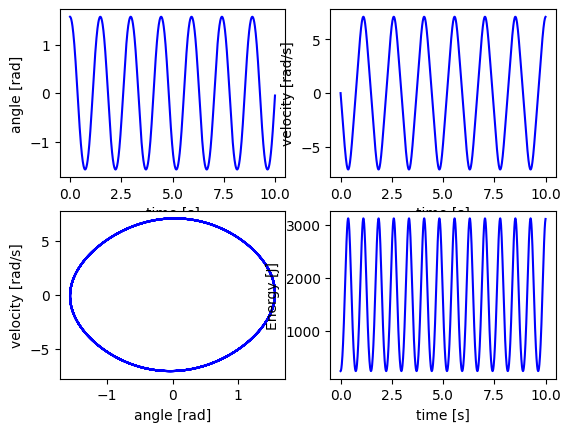

In [7]:
plt.subplot(221)
plt.plot(time, q, 'b-')
plt.xlabel('time [s]')
plt.ylabel('angle [rad]')
plt.subplot(222)
plt.plot(time, p, 'b-')
plt.xlabel('time [s]')
plt.ylabel('velocity [rad/s]')
plt.subplot(223)
plt.plot(q, p, 'b-')
plt.xlabel('angle [rad]')
plt.ylabel('velocity [rad/s]')
plt.subplot(224)
plt.plot(time, E, 'b-')
plt.xlabel('time [s]')
plt.ylabel('Energy [J]')
plt.show()

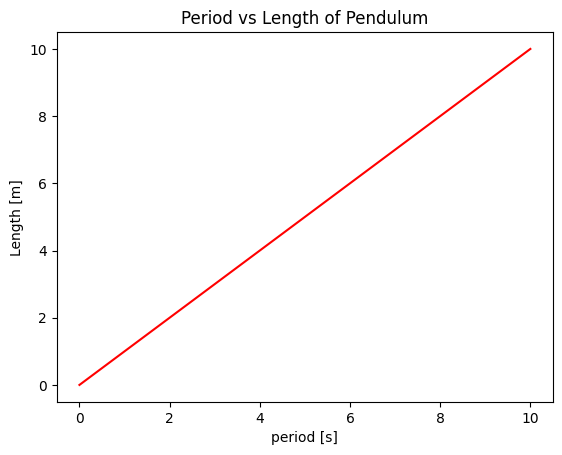

In [8]:

plt.plot(period, time, 'r-')
plt.title('Period vs Length of Pendulum')
plt.xlabel('period [s]')
plt.ylabel('Length [m]')
plt.show()